Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/10
163/163 [==============================] - 369s 2s/step - loss: 0.3784 - accuracy: 0.8393 - val_loss: 0.7532 - val_accuracy: 0.7500
Epoch 2/10
163/163 [==============================] - 376s 2s/step - loss: 0.2497 - accuracy: 0.8988 - val_loss: 0.6659 - val_accuracy: 0.7500
Epoch 3/10
163/163 [==============================] - 387s 2s/step - loss: 0.2117 - accuracy: 0.9137 - val_loss: 0.8159 - val_accuracy: 0.6250
Epoch 4/10
163/163 [==============================] - 380s 2s/step - loss: 0.1883 - accuracy: 0.9239 - val_loss: 0.5385 - val_accuracy: 0.8125
Epoch 5/10
163/163 [==============================] - 381s 2s/step - loss: 0.1735 - accuracy: 0.9310 - val_loss: 0.7680 - val_accuracy: 0.7500
Epoch 6/10
163/163 [==============================] - 382s 2s/step - loss: 0.1530 - accuracy: 0.9431 - val_loss: 0.8403 - val_accuracy: 0.6250
Epoch 7/10
163/163 

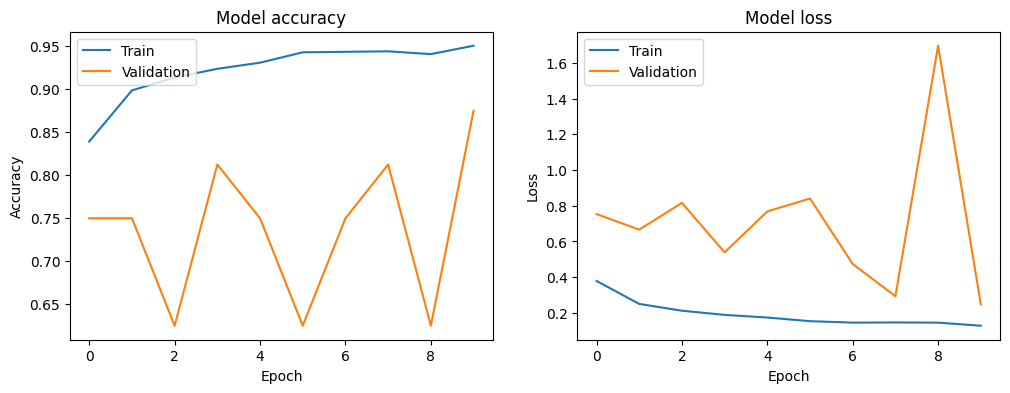

In [ ]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

# Download the dataset using Kaggle API (ensure you have the Kaggle API configured)
os.system('kaggle datasets download -d paultimothymooney/chest-xray-pneumonia')

# Extract the dataset
with zipfile.ZipFile('chest-xray-pneumonia.zip', 'r') as zip_ref:
    zip_ref.extractall('chest_xray')


# Define directories
base_dir = 'chest_xray/chest_xray'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

# Load data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = val_generator.samples // val_generator.batch_size

if steps_per_epoch == 0:
    steps_per_epoch = 1
if validation_steps == 0:
    validation_steps = 1

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_generator,
    validation_steps=validation_steps,
    epochs=10
)

test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Test accuracy: {test_acc}')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()